# Kayla Hoffman
COSI 143 - Programming Assignment 0


Brooklyn data set

Loading and Cleaning the data

In [1]:
#load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#load the data into a data frame and print the first few entries
df = pd.read_excel('rollingsales_brooklyn.xls', header = 4)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,403572,2013-07-09
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,218010,2013-07-12
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,952311,2013-04-25
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,842692,2013-04-25
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,815288,2013-04-25


In [3]:
#display the data types for the attributes
#see that SALE PRICE and LAND/GROSS SQUARE FEET are already numeric
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APART\nMENT\nNUMBER                       object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE\nPRICE                                int64
SALE DATE           

Exploring the Data set

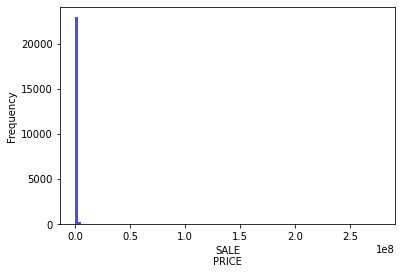

In [4]:
#print histogram with sale price as y-axis
num_bins = 100
#the name for SALE PRICE is slightly different for this data set
plt.hist(df['SALE\nPRICE'], num_bins,facecolor='blue', alpha=0.7)
plt.xlabel('SALE\nPRICE') # label x-axis
plt.ylabel('Frequency') # label y-axis
plt.show()

In [5]:
#drops the rows with a sale price of 0
df.drop(df.loc[df['SALE\nPRICE']==0].index, inplace=True)
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE\nPRICE
count,14582.0,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,1.458200e+04,1.458200e+04,14582.000000,14582.000000,1.458200e+04
mean,3.0,3826.816349,291.555342,11212.145316,2.041901,0.146688,2.191332,2.869058e+03,2.666417e+03,1735.471197,1.635098,8.469302e+05
std,0.0,2647.766461,480.315000,293.982018,8.004548,1.445326,8.151665,5.580049e+04,2.332843e+04,592.764192,0.774984,3.534512e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
25%,3.0,1447.000000,21.000000,11209.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1905.000000,1.000000,3.000000e+05
50%,3.0,3370.500000,47.000000,11219.000000,1.000000,0.000000,1.000000,1.737000e+03,1.548000e+03,1925.000000,2.000000,5.177500e+05
75%,3.0,6191.000000,120.000000,11230.000000,2.000000,0.000000,2.000000,2.275000e+03,2.788750e+03,1951.000000,2.000000,8.095080e+05
max,3.0,8955.000000,4002.000000,11416.000000,509.000000,123.000000,509.000000,6.028665e+06,2.548000e+06,2012.000000,4.000000,2.769470e+08


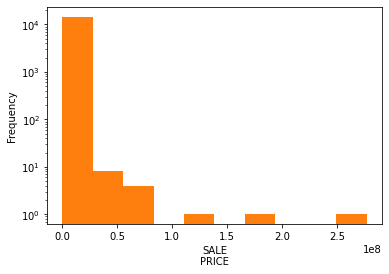

In [6]:
#histrogram of SALE PRICE with log scale and no 0 values
#more useful look at the data, but it is still right skewed
num_bins = 100
plt.hist(df['SALE\nPRICE'], num_bins,facecolor='blue', alpha=0.7)
plt.hist(df['SALE\nPRICE'], log=True)
plt.xlabel('SALE\nPRICE') # label x-axis
plt.ylabel('Frequency') # label y-axis
plt.show()

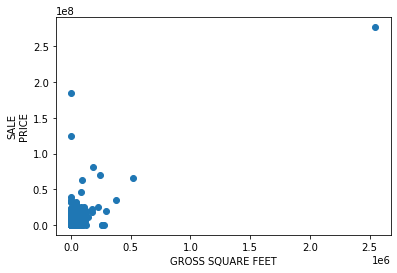

In [7]:
#Scatterplot to demonstrate relationship between sale price (y) and gross square feet)
#there is an outlier
plt.scatter(df['GROSS SQUARE FEET'], df['SALE\nPRICE']) # generate scatterplot
plt.xlabel('GROSS SQUARE FEET') # label x-axis
plt.ylabel('SALE\nPRICE') # label y-axis
plt.show() # print plot

In [8]:
maxGross = df['GROSS SQUARE FEET'].idxmax()
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].drop(maxGross)
df['SALE\nPRICE'] = df['SALE\nPRICE'].drop(maxGross)

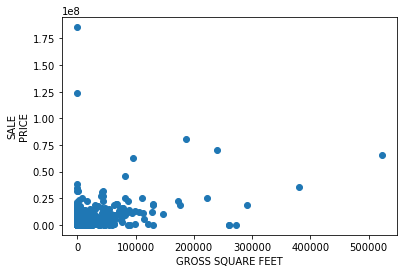

In [9]:
#Scatterplot to demonstrate relationship between sale price (y) and gross square feet)
#with the outlier removed, there is a much closer look at the data
#there may be some correlation, but without more analysis it is unclear
plt.scatter(df['GROSS SQUARE FEET'], df['SALE\nPRICE']) # generate scatterplot
plt.xlabel('GROSS SQUARE FEET') # label x-axis
plt.ylabel('SALE\nPRICE') # label y-axis
plt.show() # print plot

In [10]:
familyhomes = df.loc[df['BUILDING CLASS CATEGORY'].str.contains("FAMILY HOMES")]
familyhomes.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVENUE,,...,1,0,1,2058,1492.0,1930,1,A9,560000.0,2013-06-06
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH STREET,,...,1,0,1,4833,1724.0,1930,1,A1,860000.0,2012-12-18
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH STREET,,...,1,0,1,2417,2132.0,1930,1,A9,508000.0,2012-08-24
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH STREET,,...,1,0,1,3867,1704.0,1899,1,A1,600000.0,2013-06-18
30,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,69,,S1,8662 BAY PARKWAY,,...,1,1,2,2707,3304.0,1960,1,S1,820000.0,2012-11-29


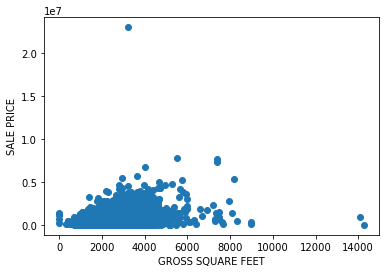

In [11]:
plt.scatter(familyhomes['GROSS SQUARE FEET'], familyhomes['SALE\nPRICE'])
plt.xlabel('GROSS SQUARE FEET') # label x-axis
plt.ylabel('SALE PRICE') # label y-axis
plt.show() # print plot